In [30]:
import pandas as pd
import numpy as np

books = pd.read_csv("../data/Books.csv", sep=',', dtype='unicode')
ratings = pd.read_csv("../data/Ratings.csv", sep=',', dtype='unicode')
users = pd.read_csv("../data/Users.csv", sep=',', dtype='unicode')


In [31]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [32]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  object
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  object
dtypes: object(3)
memory usage: 26.3+ MB


In [34]:
ratings.columns=ratings.columns.str.strip().str.lower().str.replace('-','_')

In [35]:
print(ratings.isnull().sum())

user_id        0
isbn           0
book_rating    0
dtype: int64


In [36]:
ratings.loc[(ratings['user_id'].isnull()),: ]

,user_id,isbn,book_rating


In [37]:
unique_ratings = ratings[ratings['isbn'].isin(books['ISBN'])]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [38]:
print(ratings.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [39]:
unique_ratings['book_rating'].unique()

array(['0', '5', '3', '6', '7', '9', '8', '10', '1', '4', '2'],
      dtype=object)

In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  object
 1   Location  278858 non-null  object
 2   Age       168096 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [41]:
users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [42]:

missing_values_count = users['Location'].isna().sum()
print("Number of missing values in the 'Location' column:", missing_values_count)


Number of missing values in the 'Location' column: 0


In [43]:
users['User-ID'].unique()

array(['1', '2', '3', ..., '278856', '278857', '278858'], dtype=object)

In [44]:
#unique value of Age
users['Age'].unique()

array([nan, '18.0', '17.0', '61.0', '26.0', '14.0', '25.0', '19.0',
       '46.0', '55.0', '32.0', '24.0', '20.0', '34.0', '23.0', '51.0',
       '31.0', '21.0', '44.0', '30.0', '57.0', '43.0', '37.0', '41.0',
       '54.0', '42.0', '50.0', '39.0', '53.0', '47.0', '36.0', '28.0',
       '35.0', '13.0', '58.0', '49.0', '38.0', '45.0', '62.0', '63.0',
       '27.0', '33.0', '29.0', '66.0', '40.0', '15.0', '60.0', '0.0',
       '79.0', '22.0', '16.0', '65.0', '59.0', '48.0', '72.0', '56.0',
       '67.0', '1.0', '80.0', '52.0', '69.0', '71.0', '73.0', '78.0',
       '9.0', '64.0', '103.0', '104.0', '12.0', '74.0', '75.0', '231.0',
       '3.0', '76.0', '83.0', '68.0', '119.0', '11.0', '77.0', '2.0',
       '70.0', '93.0', '8.0', '7.0', '4.0', '81.0', '114.0', '230.0',
       '239.0', '10.0', '5.0', '148.0', '151.0', '6.0', '101.0', '201.0',
       '96.0', '84.0', '82.0', '90.0', '123.0', '244.0', '133.0', '91.0',
       '128.0', '94.0', '85.0', '141.0', '110.0', '97.0', '219.0', '86.0',
 

In [45]:

missing_values_count = users['Age'].isna().sum()
print("Number of missing values in the 'Age' column:", missing_values_count)


Number of missing values in the 'Age' column: 110762


In [47]:
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')
users['Age'].fillna((users['Age'].mean()), inplace=True)
users['Age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [48]:
users.loc[(users['Age'] > 90) | (users['Age'] < 5)] = np.nan

In [49]:
users['Age'].fillna((users['Age'].mean()), inplace=True)
users['Age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

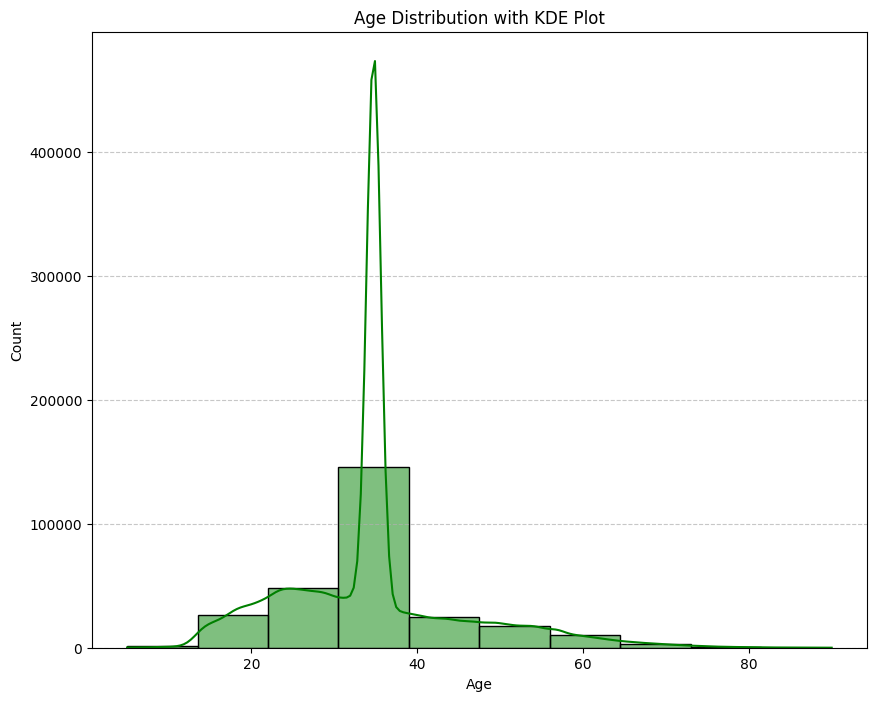

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(users)

plt.figure(figsize=(10, 8))

# Create a histogram with a KDE plot for age distribution
sns.histplot(data=df, x='Age', bins=10, kde=True, color='green')

plt.title('Age Distribution with KDE Plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

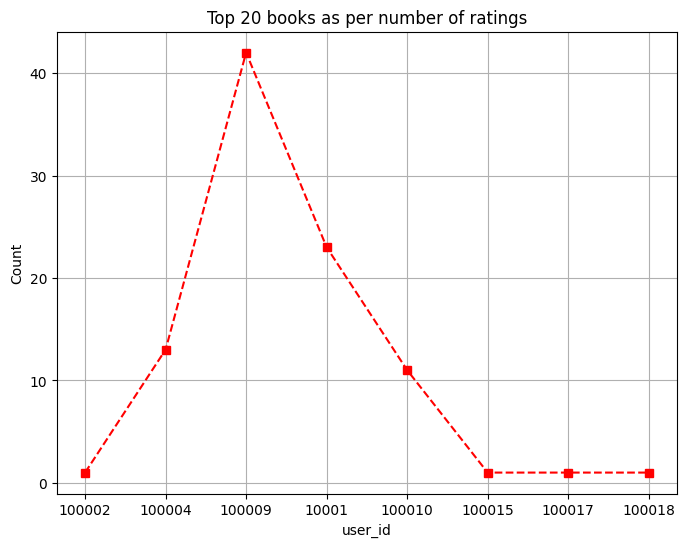

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))

# Count the number of occurrences for each book rating
rating_counts = ratings['user_id'].value_counts().sort_index()

# Create a line plot for book rating distribution
plt.plot(rating_counts.index[4:12], rating_counts.values[4:12], marker='s', linestyle='--', color='red')

plt.title("Top 20 books as per number of ratings")
plt.xlabel("user_id")
plt.ylabel("Count")
plt.grid(True)
plt.show()

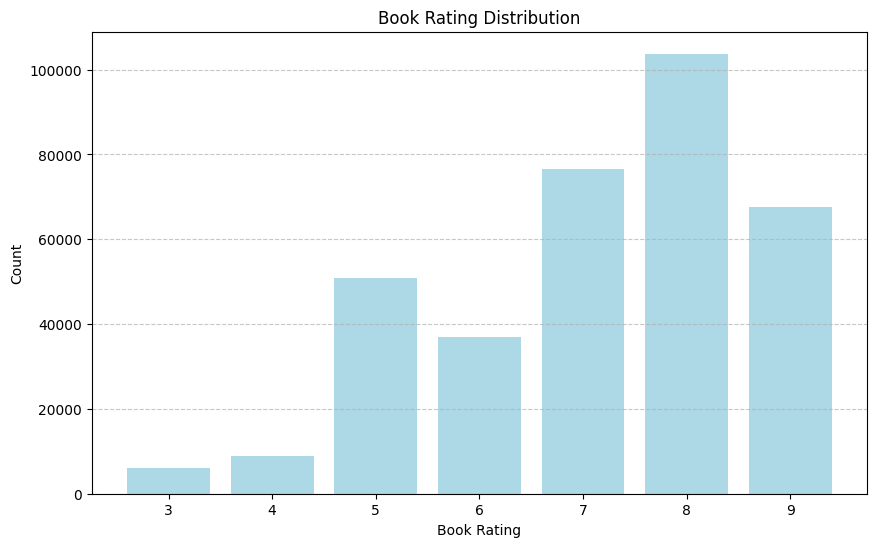

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(ratings)

plt.figure(figsize=(10, 6))

# Count the number of occurrences for each book rating
rating_counts = df['book_rating'].value_counts().sort_index()

# Create a bar plot for book rating distribution
plt.bar(rating_counts.index[4:12], rating_counts.values[4:12], color='lightblue')

plt.title("Book Rating Distribution")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [68]:
#ratings_with_name = ratings.merge(books,on='isbn')

ratings_with_name = ratings.merge(books, left_on='isbn', right_on='ISBN')
num_rating_df = ratings_with_name.groupby('Book-Title').count()['book_rating'].reset_index()
num_rating_df.rename(columns={'book_rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [69]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book_Rating'].reset_index()
avg_rating_df.rename(columns={'Book_Rating':'avg_rating'},inplace=True)
avg_rating_df

TypeError: Could not convert 006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X006250746X to numeric

In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
popular_df['Image-URL-M'][0]

In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data
recommend('1984')

In [ ]:
 pt.index[545]

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
books.drop_duplicates('Book-Title')

In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))